In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
def plot_contour(x_contour,y_contour):            
    # now let's overplot some contours. First we have to make a 2d
    # histogram of the point distribution.
    vals, xedges, yedges = np.histogram2d(x_contour, y_contour, bins=100)
       
    # Now we have the bin edges, but we want to find the bin centres to
    # plot the contour positions - they're half way between the edges:
    xbins = 0.5 * (xedges[:-1] + xedges[1:])
    ybins = 0.5 * (yedges[:-1] + yedges[1:])
    
    # now plot the contours
    plt.contour(xbins, ybins, vals.T, 10, colors='k')
    plt.xlim([-22,-17])
    plt.ylim([1.1,3.4])
    plt.xlabel('M r,petro')
    plt.ylabel('(u-r)model')
    title_str = 'Observed bivariate distribution of the MGS in rest-frame color vs. absolute magnitude.'
    plt.title(title_str)
  
   
def db_plot(file_name):    
    array = np.load(file_name)
    print(len(array),array.shape)
    
    x = []
    y = []

    # array m_petro, ur_colour,redshift
    for i, row in enumerate(array):
            if array[i][4] > 0.004 and array[i][4] < 0.08:
            #    if array[i][1] > 0 and array[i][1] < 3.5:
            #        if array[i][2] < -15.5 and array[i][2] > -23.5: 
                        x.append(array[i][2])
                        y.append(array[i][3])

    plt.close()
    plt.figure(figsize=(20,10))                    
            
    plot_contour(x,y)
    print(len(x))
    
def plot_hist(array,bin_num):
    #weights = np.ones_like(array)/len(array)
    n, bins, patches = plt.hist(array,bins=bin_num)
    plt.close()
    return bins, n

580316 (580316, 5)
187953


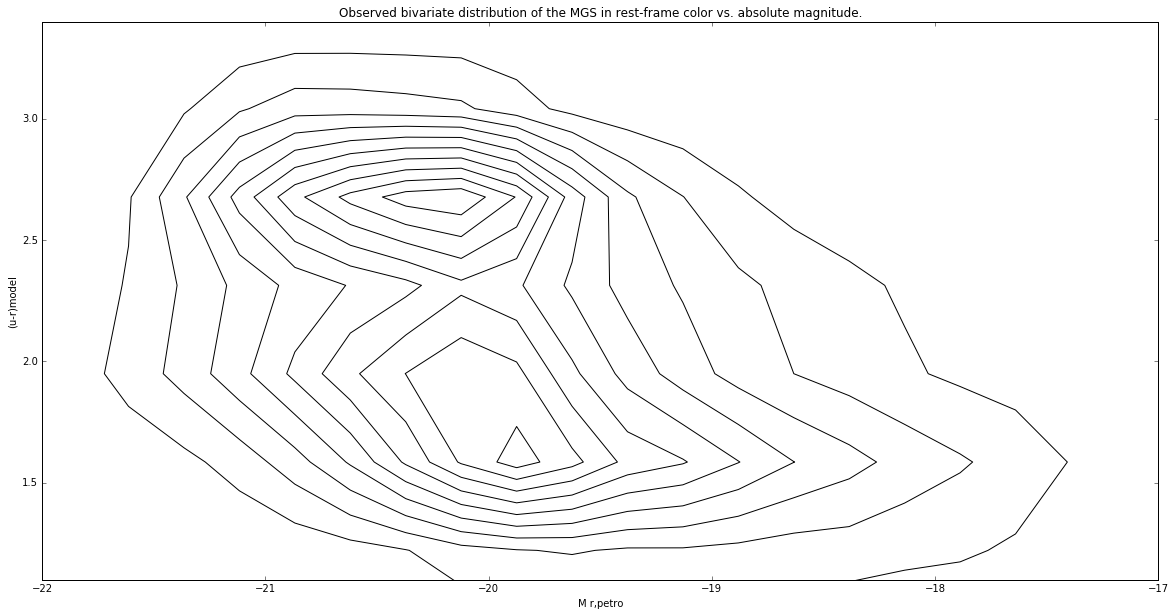

In [35]:
db_plot('/home/calum/Documents/Mphys_data/mgs_multiwavelength/init_mgs_multiwavelength.npy')
plt.savefig('mgs_cm.png')

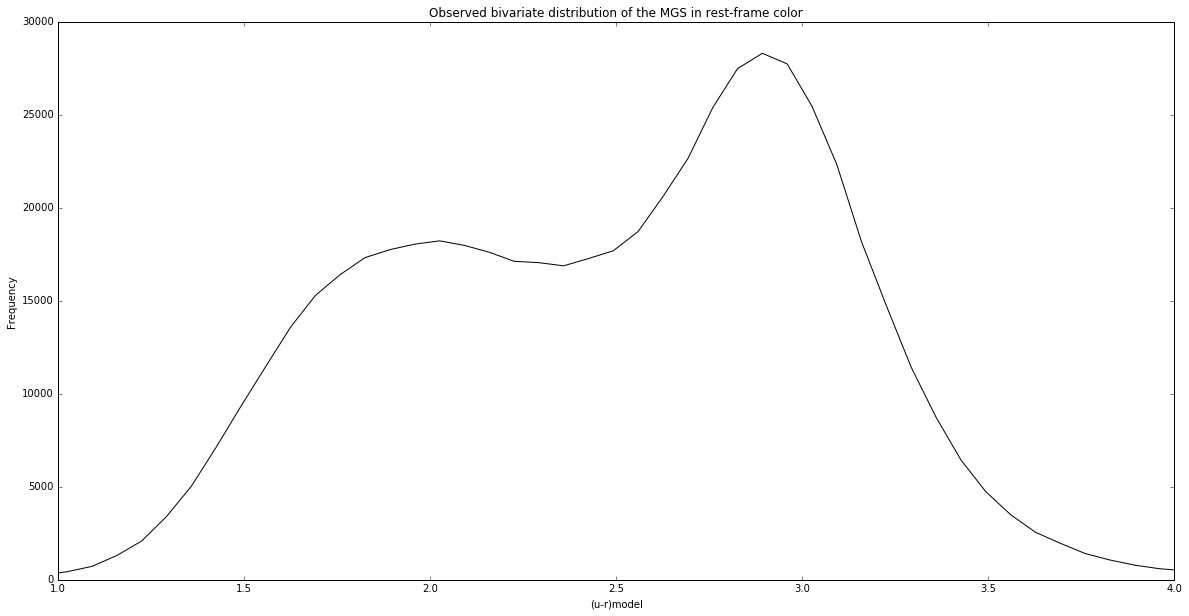

In [36]:
array = np.load('/home/calum/Documents/Mphys_data/mgs_multiwavelength/init_mgs_multiwavelength.npy')

t_array = array.T

bins_z, n_z = plot_hist(t_array[3],800)

plt.figure(figsize=(20,10))
plt.plot(bins_z[1:], n_z,'k',label='Full sample')
plt.xlim(1.0,4)

plt.title('Observed bivariate distribution of the MGS in rest-frame color')
plt.ylabel('Frequency')
plt.xlabel('(u-r)model')



In [37]:
def gplot_contour(x_contour,y_contour): 
    plt.figure()
    # now let's overplot some contours. First we have to make a 2d
    # histogram of the point distribution.
    vals, xedges, yedges = np.histogram2d(x_contour, y_contour, bins=30)
    # for scaling
    tvals, txedges, tyedges = np.histogram2d(x_contour, y_contour, bins=150)
       
    # Now we have the bin edges, but we want to find the bin centres to
    # plot the contour positions - they're half way between the edges:
    xbins = 0.5 * (xedges[:-1] + xedges[1:])
    ybins = 0.5 * (yedges[:-1] + yedges[1:])
    
    # now plot the contours
    plt.contourf(xbins, ybins, vals.T, 20, zorder=10)
    plt.xlim([-23,-16])
    plt.ylim([0.1,3.4])
    plt.xlabel('M r,petro')
    plt.ylabel('(u-r)model')
    title_str = 'Observed bivariate distribution of the sample in rest-frame color vs. \
    absolute magnitude. Sample size '+str(len(x_contour))+' galaxies. Colour plot 150 bins, Contour 30 bins.'
    plt.title(title_str)
    plt.colorbar()
    
def gdb_plot(file_name):    
    array = np.load(file_name)
    
    x = []
    y = []
    e_x = []
    e_y = []
    s_x = []
    s_y = []
    # array x,y,redshift,dustval
    for i, row in enumerate(array):
            if array[i][2] > 0.004 and array[i][2] < 0.08:
            #    if array[i][1] > 0 and array[i][1] < 3.5:
            #        if array[i][2] < -15.5 and array[i][2] > -23.5: 
                        x.append(array[i][0])
                        y.append(array[i][1])
                        # ellipticals
                        if array[i][3] > 0.75:
                            e_x.append(array[i][0])
                            e_y.append(array[i][1])
                        # spirals
                        elif array[i][4] > 0.75 or array[i][5] > 0.75:
                            s_x.append(array[i][0])
                            s_y.append(array[i][1])
    print(len(e_x),len(s_x))
                            
    return e_x, e_y, s_x, s_y

In [38]:
e_x, e_y, s_x, s_y = gdb_plot('/home/calum/Documents/Mphys_data/galaxy_zoo_data/galaxy_zoo_classifications.npy')

21812 12334


580316 (580316, 5)
187953


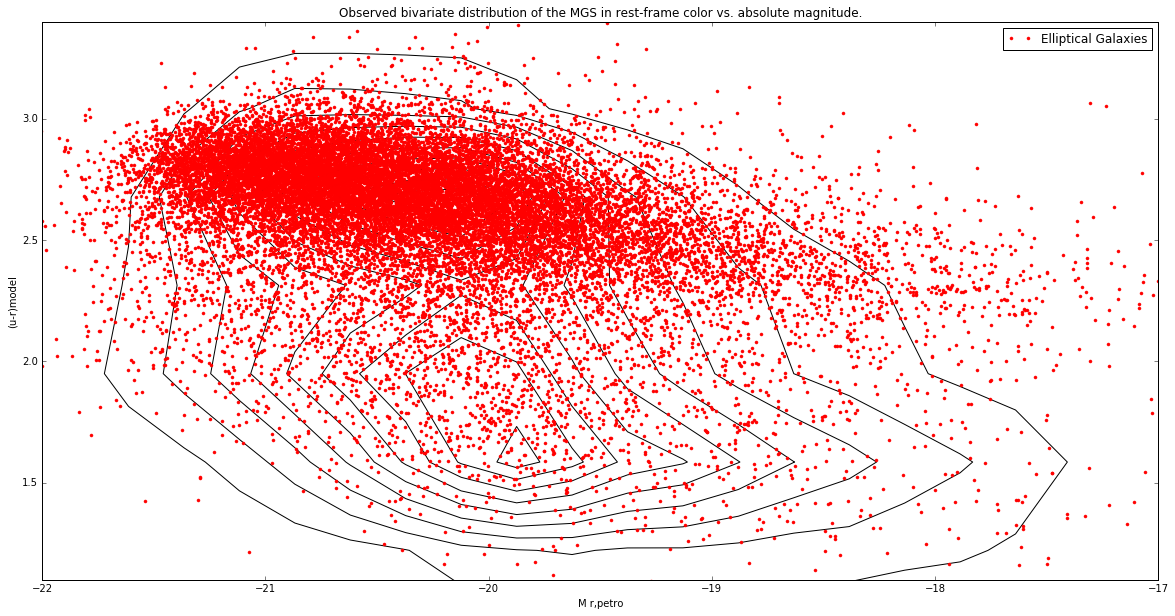

In [39]:
db_plot('/home/calum/Documents/Mphys_data/mgs_multiwavelength/init_mgs_multiwavelength.npy')
plt.plot(e_x,e_y, '.', label = 'Elliptical Galaxies', color='r')
plt.legend()
plt.savefig('mgs_cm_ellipticals.png')

580316 (580316, 5)
187953


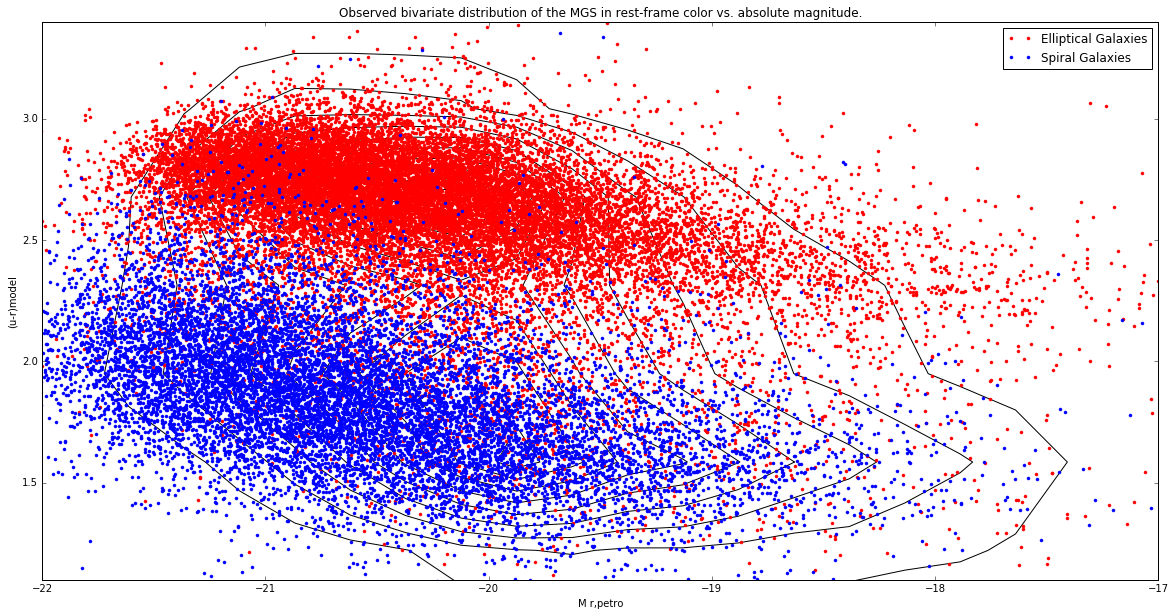

In [40]:
db_plot('/home/calum/Documents/Mphys_data/mgs_multiwavelength/init_mgs_multiwavelength.npy')
plt.plot(e_x,e_y, '.', label = 'Elliptical Galaxies', color='r')
plt.plot(s_x,s_y, '.', label = 'Spiral Galaxies', color='b')
plt.legend()
plt.savefig('mgs_cm_classifications.png')

580316 (580316, 5)
187953


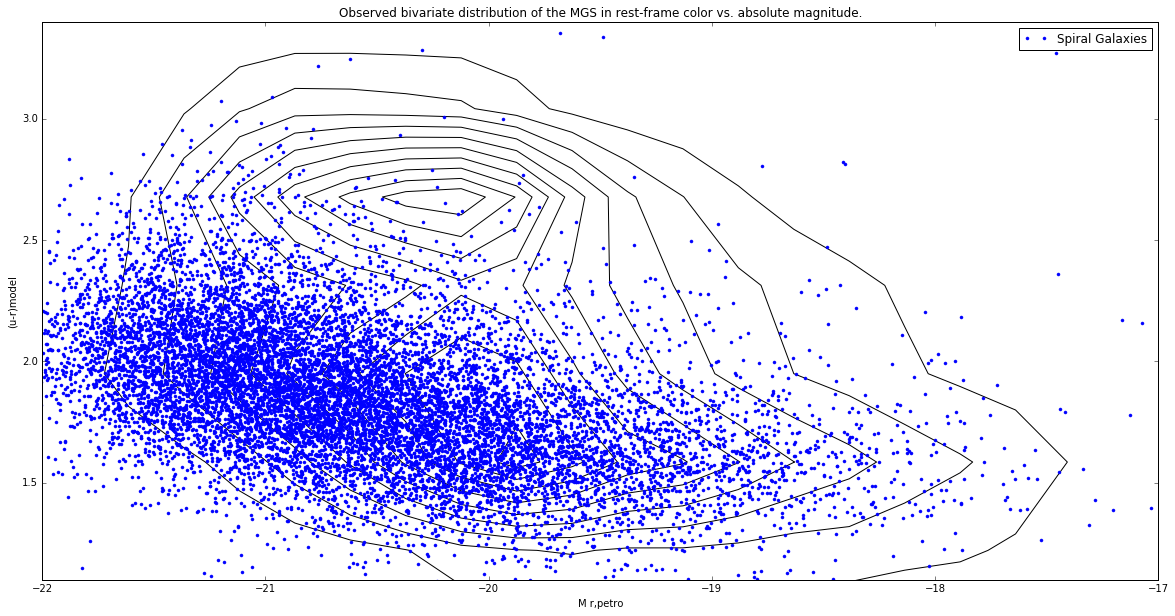

In [41]:
db_plot('/home/calum/Documents/Mphys_data/mgs_multiwavelength/init_mgs_multiwavelength.npy')
plt.plot(s_x,s_y, '.', label = 'Spiral Galaxies')
plt.legend()
plt.savefig('mgs_cm_spirals.png')

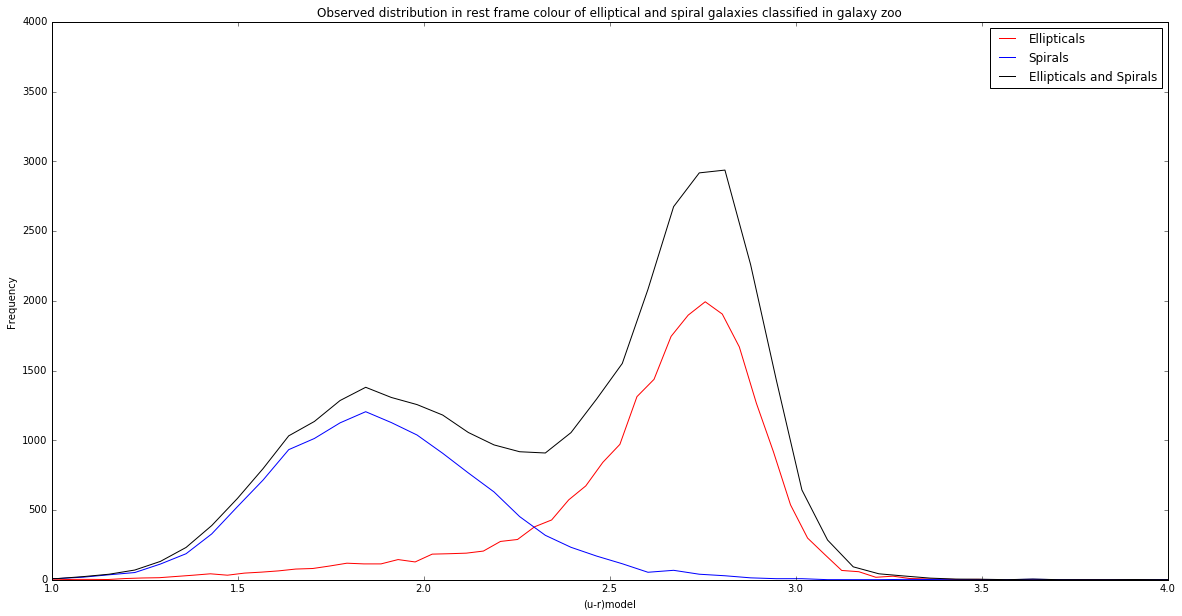

In [50]:
array = np.load('/home/calum/Documents/Mphys_data/mgs_multiwavelength/init_mgs_multiwavelength.npy')

t_array = array.T

number = 450
bins_e, n_e = plot_hist(e_y,number)
bins_s, n_s = plot_hist(s_y,number)
bins , n = plot_hist(np.append(e_y,s_y),number)

plt.figure(figsize=(20,10))
plt.plot(bins_e[1:], n_e,'b',label='Ellipticals', color='r')
plt.plot(bins_s[1:], n_s,'b',label='Spirals', color='b')
plt.plot(bins[1:], n,'b',label='Ellipticals and Spirals', color='k')
plt.legend()

plt.xlim(1,4.0)
plt.ylim(0,4000)
plt.title('Observed distribution in rest frame colour of elliptical and spiral galaxies classified in galaxy zoo')
plt.ylabel('Frequency')
plt.xlabel('(u-r)model')

In [43]:
len(e_x), len(s_y), len(np.append(e_y,s_y))

(21812, 12334, 34146)

In [44]:
np.append(e_y,s_y).shape

(34146,)